# **Pré-processing**

## Modification de df2 en vue d'un df_final



---



Ici, nous allons observer le df2 initial composé d'indicateurs du bonheur de plusieurs pays, sur plusieurs années.

Nous apporter à ce df des informations sur la guerre et le taux de chômage.



*   Import des modules nécessaires




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

%matplotlib inline



*   Import et observation du df2 initial



In [ ]:
#Import du jeu de données
df2 = pd.read_csv('world-happiness-report.csv')

#Observation
display(df2.head())
display(df2.info())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


None

**1. Nettoyage et adaptation du dataset "war_casualties"**

In [ ]:
#Import du jeux de données
df = pd.read_csv('war_casualties.csv')

#Observation du df
display(df.head())
display(df.info())

#Observation du nombre d'années
display(df.year.value_counts())

<ipython-input-120-e3d84834ff8d>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('war_casualties.csv')


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

None

2014    25885
2013    24458
2015    19551
2012    18451
2016    16796
2021    16609
2017    15851
2019    13244
2018    13065
2020    12692
2011     7599
1992     7321
2009     7035
2007     6695
1994     6617
1993     6504
2002     6435
2008     6279
2010     6223
2004     6153
2000     5432
2005     5334
2006     5243
2003     4333
2001     4140
1999     4079
1995     3875
1998     3716
1990     3196
1996     2858
1991     2855
1997     2569
1989     2541
Name: year, dtype: int64

In [ ]:
#Reduction du nombre de variables
col = ['year', 'conflict_name', 'side_a', 'side_b', 'country', 'deaths_civilians']
df_clear = df[col]



In [ ]:
# Reduction du df aux années après 2010

df_clear = df_clear[df_clear.year > 2010]

df_clear.head()

,year,conflict_name,side_a,side_b,country,deaths_civilians
0,2017,Iraq: Government,Government of Iraq,IS,Afghanistan,0
1,2021,Iraq: Government,Government of Iraq,IS,Afghanistan,141
2,2021,Iraq: Government,Government of Iraq,IS,Afghanistan,0
3,2021,Iraq: Government,Government of Iraq,IS,Afghanistan,10
348,2011,Afghanistan: Government,Government of Afghanistan,Hizb-i Islami-yi Afghanistan,Afghanistan,0


In [ ]:
#Création d'un df avec les pays années et information de guerre groupées
df_deaths_civilians = pd.DataFrame(df_clear.groupby(by = ['country', 'year'], as_index = False)['deaths_civilians'].sum())

In [ ]:
#Modification du nom de la colonne pour correspondre au df2
df_deaths_civilians = df_deaths_civilians.rename(columns = {'country': 'Country name'})

In [ ]:
#Prise de connaissance du df
display(df_deaths_civilians.head(15))
display(df_deaths_civilians.info())
display(df_deaths_civilians.isna().sum())

,Country name,year,deaths_civilians
0,Afghanistan,2011,1024
1,Afghanistan,2012,908
2,Afghanistan,2013,930
3,Afghanistan,2014,876
4,Afghanistan,2015,900
5,Afghanistan,2016,1084
6,Afghanistan,2017,1060
7,Afghanistan,2018,1858
8,Afghanistan,2019,1759
9,Afghanistan,2020,1647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country name      604 non-null    object
 1   year              604 non-null    int64 
 2   deaths_civilians  604 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.3+ KB


None

Country name        0
year                0
deaths_civilians    0
dtype: int64

**2. Nettoyage et adaptation du dataset "unemployment 2.csv**

In [ ]:
#Importer le jeu de données
df_chomage = pd.read_csv('unemployment analysis 2.csv')

#Observation
display(df_chomage.head())
display(df_chomage.info())


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

None

In [ ]:
#Supprimer la colonne Country Code
df_chomage = df_chomage.drop('Country Code', axis = 1)



In [ ]:
#Pivoter le tableau 
df_chomage = df_chomage.melt(id_vars=['Country Name'], var_name='Years', value_name='Taux de chômage')

display(df_chomage.head(10))
display(df_chomage.info())

,Country Name,Years,Taux de chômage
0,Africa Eastern and Southern,1991,7.80
1,Afghanistan,1991,10.65
2,Africa Western and Central,1991,4.42
3,Angola,1991,4.21
4,Albania,1991,10.31
5,Arab World,1991,11.62
6,United Arab Emirates,1991,1.87
7,Argentina,1991,5.44
8,Armenia,1991,1.60
9,Australia,1991,9.58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     7285 non-null   object 
 1   Years            7285 non-null   object 
 2   Taux de chômage  7285 non-null   float64
dtypes: float64(1), object(2)
memory usage: 170.9+ KB


None

In [ ]:
#Changement du type des variables "Years" 
df_chomage['Years'] = df_chomage['Years'].astype(int)


In [ ]:
#Modification des noms de pays afin de correspondre aux pays de df2

Noms_pays = {'Congo, Rep.' : 'Congo (Brazzaville)',
             'Egypt, Arab Rep.' : 'Egypt',
             'Gambia, The' : 'Gambia',
             'Hong Kong SAR, China' : 'Hong Kong S.A.R. of China',
             'Iran, Islamic Rep.' : 'Iran',
             'Iraq' : 'Iraq',
             "Cote d'Ivoire" : 'Ivory Coast',
             'Kyrgyz Republic' : 'Kyrgyzstan',
             'Lao PDR' : 'Laos',
             'Maldives' : 'Maldives',
             'Montenegro' : 'Montenegro',
             'Russian Federation' : 'Russia',
             'Slovak Republic' : 'Slovakia',
             'Korea, Rep.' : 'South Korea',
             'Eswatini' : 'Swaziland',
             'Turkiye' : 'Turkey',
             'Venezuela, RB' : 'Venezuela',
             'Yemen, Rep.' : 'Yemen',
             'Maldives' : 'Maldives'}

df_chomage['Country Name'] = df_chomage['Country Name'].replace(Noms_pays)


In [ ]:
#Modification des noms des colonnes
dict = {'Country Name': 'Country name',
        'Years' : 'year',
        'Taux de chômage': 'Unemployment rate'}
df_chomage = df_chomage.rename(columns = dict)


#Selection des années après 2010
df_chomage = df_chomage[df_chomage['year'] > 2010]

display(df_chomage.head())
display(df_chomage.info())

,Country name,year,Unemployment rate
4700,Africa Eastern and Southern,2011,6.75
4701,Afghanistan,2011,11.05
4702,Africa Western and Central,2011,4.55
4703,Angola,2011,7.36
4704,Albania,2011,13.48


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 4700 to 7284
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country name       2585 non-null   object 
 1   year               2585 non-null   int64  
 2   Unemployment rate  2585 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 80.8+ KB


None

**3. Jointures des df pour obtenir un df final**

In [ ]:
#Import du jeu de données
df2 = pd.read_csv('world-happiness-report.csv')

#Observation 
display(df2.info())
display(df2.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


None

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
#Selection des années après 2O10
df2 = df2[df2['year'] > 2010]

In [ ]:
#Jointure du df death civilians et df2
df_test = df2.merge(df_deaths_civilians, how = 'left', on = ['Country name', 'year'])

#Merge du df initial et df df_deaths_civilians
df_final = df_test.merge(df_chomage, how = 'left', on = ['Country name', 'year'])

#Conserver uniquement les lignes des pays qui ont au moins 10 valeurs dans la colonne "year".
df_final = df_final.groupby('Country name').filter(lambda x: x['year'].count() >= 10)

In [ ]:
#Observation

display(df_final.head())
display(df_final.info())


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,deaths_civilians,Unemployment rate
9,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257,NaN,13.48
10,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271,NaN,13.38
11,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,0.338,NaN,15.87
12,Albania,2014,4.814,9.378,0.626,67.52,0.735,-0.025,0.883,0.685,0.335,NaN,18.05
13,Albania,2015,4.607,9.403,0.639,67.80,0.704,-0.081,0.885,0.688,0.350,NaN,17.19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 9 to 1382
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      800 non-null    object 
 1   year                              800 non-null    int64  
 2   Life Ladder                       800 non-null    float64
 3   Log GDP per capita                788 non-null    float64
 4   Social support                    799 non-null    float64
 5   Healthy life expectancy at birth  780 non-null    float64
 6   Freedom to make life choices      793 non-null    float64
 7   Generosity                        781 non-null    float64
 8   Perceptions of corruption         752 non-null    float64
 9   Positive affect                   794 non-null    float64
 10  Negative affect                   796 non-null    float64
 11  deaths_civilians                  205 non-null    float64
 12  Unemplo

None

**4. Nettoyage du df_final**

Gestion des valeurs manquantes

In [ ]:
#Observation des valeurs manquantes
df_final.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   12
Social support                        1
Healthy life expectancy at birth     20
Freedom to make life choices          7
Generosity                           19
Perceptions of corruption            48
Positive affect                       6
Negative affect                       4
deaths_civilians                    595
Unemployment rate                    20
dtype: int64

In [ ]:
#Remplacer les NaN de 'deaths_civilians" par des 0 car cela signifie qu'il n'y a eu aucun mort de guerre
df_final['deaths_civilians'] = df_final['deaths_civilians'].fillna(0)

In [ ]:
#Calcul du pourcentage de valeurs manquantes par variable
df_final.isna().mean()*100

Country name                        0.000
year                                0.000
Life Ladder                         0.000
Log GDP per capita                  1.500
Social support                      0.125
Healthy life expectancy at birth    2.500
Freedom to make life choices        0.875
Generosity                          2.375
Perceptions of corruption           6.000
Positive affect                     0.750
Negative affect                     0.500
deaths_civilians                    0.000
Unemployment rate                   2.500
dtype: float64

Les variables contiennent relativement peu de valeurs manquantes, sauf "Perceptions of corruption ". Nous choisissons de continuer le nettoyage avant de prendre une décision à son propos

In [ ]:
#Définir une fonction qui trouve les pays qui ont des informations manquantes pour une variable entiere, parmis les variables du DataFrame :
def pays_sans_informations_manquantes(df, variables):
    pays_sans_info = []
    for variable in variables:
        non_missing_counts = df.groupby('Country name')[variable].count()
        pays_sans_info_variable = non_missing_counts[non_missing_counts == 0].index.tolist()
        pays_sans_info.extend(pays_sans_info_variable)
    return pays_sans_info

# Liste des variables à vérifier
variables = ['Log GDP per capita', 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect', 'Unemployment rate']

# Appeler la fonction pour obtenir les pays sans informations manquantes pour toutes les variables
pays_sans_info = pays_sans_informations_manquantes(df_final, variables)

# Afficher les pays sans informations manquantes pour toutes les variables
print("Pays sans informations sur toutes les années concernant les variables :")
for pays in pays_sans_info:
    print(pays)

Pays sans informations sur toutes les années concernant les variables :
China
Jordan
Saudi Arabia
United Arab Emirates
Kosovo
Taiwan Province of China


In [ ]:
#Observation plus précise des valeurs manquantes des pays cités

pays = ['China', 'Jordan', 'Saudi Arabia', 'United Arab Emirates', 'Kosovo', 'Taiwan Province of China']
pays_entries = df_final[df_final['Country name'].isin(pays)]
pays_entries.isna().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   4
Social support                       1
Healthy life expectancy at birth    20
Freedom to make life choices         4
Generosity                           7
Perceptions of corruption           40
Positive affect                      5
Negative affect                      4
deaths_civilians                     0
Unemployment rate                   20
dtype: int64

La variable "Perceptions of corruption " contient des valeurs manquantes sur l'ensemble des années de 6 pays. Afin d'éviter d'avoir à supprimer ces lignes qui sont, en dehors de cette variable, complètes, nous preferons supprimer la variable même si le taux de valeur manquante n'est égale qu'a 6%.

In [ ]:
#Supression de la variable "Perceptions of corruption" qui contient des NaN sur des pays entier
df_final = df_final.drop('Perceptions of corruption', axis = 1)

Employment rate : les valeurs manquantes concernent toutes les années de plusieurs pays, nous souhaitons connaitre les pays concernés

In [ ]:
# Calculer le nombre de valeurs non manquantes par pays dans la colonne "unemployment rate"
non_missing_counts = df_final.groupby('Country name')['Unemployment rate'].count()

# Filtrer les pays ayant un compte égal à zéro (c'est-à-dire aucunne valeur non manquante)
pays_sans_info = non_missing_counts[non_missing_counts == 0].index.tolist()

# Afficher les pays sans aucune information sur toutes les années concernant la colonne "unemployment rate"
print("Pays sans informations sur toutes les années concernant le taux de chômage :")
for pays in pays_sans_info:
    print(pays)

Pays sans informations sur toutes les années concernant le taux de chômage :
Kosovo
Taiwan Province of China


In [ ]:
#Supprimer les pays concernés 
df_final = df_final[~df_final['Country name'].isin(pays_sans_info)]

In [ ]:
#Observation de la gestion des valeurs manquantes
df_final.isna().sum()

Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   8
Social support                       1
Healthy life expectancy at birth     0
Freedom to make life choices         7
Generosity                          15
Positive affect                      6
Negative affect                      4
deaths_civilians                     0
Unemployment rate                    0
dtype: int64

Concernant les valeurs manquantes des variables suivantes, nous allons toutes les remplacer par la moyenne des années des pays concernés

In [ ]:
#Définir une fonction pour remplir les valeurs manquantes par la valeur des années du pays

def remplacer_valeurs_manquantes(df, variables):
    for variable in variables:
        moyenne_par_pays = df.groupby('Country name')[variable].transform('mean')
        df[variable].fillna(moyenne_par_pays, inplace=True)
    return df

variables = ['Log GDP per capita','Social support','Freedom to make life choices','Generosity','Positive affect', 'Negative affect']

df_final = remplacer_valeurs_manquantes(df_final, variables)

In [ ]:
#Obervation
df_final.isna().sum()

#Plus de valeurs manquantes

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Positive affect                     0
Negative affect                     0
deaths_civilians                    0
Unemployment rate                   0
dtype: int64

2.Autres modifications

In [ ]:
#Pour mieux interpreter la variable guerre, la transformer en variable binaire.
df_final['War country'] = df_final['deaths_civilians'].apply(lambda x: 1 if x > 1 else 0)

#Suppression de la variable deaths_civilians
df_final = df_final.drop('deaths_civilians', axis = 1)

In [ ]:
#Observation
display(df_final.info())
display(df_final.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 9 to 1382
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      780 non-null    object 
 1   year                              780 non-null    int64  
 2   Life Ladder                       780 non-null    float64
 3   Log GDP per capita                780 non-null    float64
 4   Social support                    780 non-null    float64
 5   Healthy life expectancy at birth  780 non-null    float64
 6   Freedom to make life choices      780 non-null    float64
 7   Generosity                        780 non-null    float64
 8   Positive affect                   780 non-null    float64
 9   Negative affect                   780 non-null    float64
 10  Unemployment rate                 780 non-null    float64
 11  War country                       780 non-null    int64  
dtypes: floa

None

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect,Unemployment rate,War country
9,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.628,0.257,13.48,0
10,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.607,0.271,13.38,0
11,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.634,0.338,15.87,0
12,Albania,2014,4.814,9.378,0.626,67.52,0.735,-0.025,0.685,0.335,18.05,0
13,Albania,2015,4.607,9.403,0.639,67.80,0.704,-0.081,0.688,0.350,17.19,0


In [ ]:
##Créer le df en format csv
df_final.to_csv('df_final.csv', index=False)

Nous obtenons un dataset de 780 lignes et 12 variables, sans valeurs manquantes, avec uniquement des valeurs numériques (excepté 'Country name'). Le dataset est prêt pour l'entrainement d'un model.

Le dataset contenant peu de lignes, les choix de nettoyages ont été fait pour supprimer un minimum de lignes et maintenir un maximum de données


Le df obtenu contient les informations souhaitées. Le df est dépourvu de valeurs manquantes. Il est prêt pour la modélisation

#                       **Modélisation**





##Appliquer des modèles pour répondre à la problématique


---




**I. Modèles quantitatifs**

**1`.Préparation du jeux de données**

In [ ]:
#Import du dataset concerné
df = pd.read_csv('df_final.csv')

#Observation
display(df.head())
display(df.info())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect,Unemployment rate,War country
0,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.628,0.257,13.48,0
1,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.607,0.271,13.38,0
2,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.634,0.338,15.87,0
3,Albania,2014,4.814,9.378,0.626,67.52,0.735,-0.025,0.685,0.335,18.05,0
4,Albania,2015,4.607,9.403,0.639,67.80,0.704,-0.081,0.688,0.350,17.19,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      780 non-null    object 
 1   year                              780 non-null    int64  
 2   Life Ladder                       780 non-null    float64
 3   Log GDP per capita                780 non-null    float64
 4   Social support                    780 non-null    float64
 5   Healthy life expectancy at birth  780 non-null    float64
 6   Freedom to make life choices      780 non-null    float64
 7   Generosity                        780 non-null    float64
 8   Positive affect                   780 non-null    float64
 9   Negative affect                   780 non-null    float64
 10  Unemployment rate                 780 non-null    float64
 11  War country                       780 non-null    int64  
dtypes: float

None

In [ ]:
#Import des packages nécessaires
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Afin de préparer notre jeux de données à la modélisation, nous allons choisir les variables prédictives et la variable dépendante séparer les jeu de données en jeu d'entrainement et jeu de test, puis standardiser les variables

In [ ]:
#SEPARATION DU JEUX DE DONNEES


# Variables prédictives
predictors = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Unemployment rate', 'War country', 'Generosity']
# Variable dépendante
dependent = 'Life Ladder'

# Filtrage des données pour l'entraînement (2011 à 2018)
train_data = df[(df['year'] >= 2011) & (df['year'] <= 2018)]

# Filtrage des données pour le test (2019 à 2020)
test_data = df[(df['year'] >= 2019) & (df['year'] <= 2020)]

# Variables prédictives pour l'entraînement
X_train = train_data[predictors]

# Variable dépendante pour l'entraînement
y_train = train_data[dependent]

# Variables prédictives pour le test
X_test = test_data[predictors]

# Variable dépendante pour le test
y_test = test_data[dependent]

# Vérification des dimensions
print("Dimensions du jeu d'entraînement - X_train :", X_train.shape)
print("Dimensions du jeu de test - X_test :", X_test.shape)
print("Dimensions du jeu d'entraînement - y_train :", y_train.shape)
print("Dimensions du jeu de test - y_test :", y_test.shape)

Dimensions du jeu d'entraînement - X_train : (624, 7)
Dimensions du jeu de test - X_test : (156, 7)
Dimensions du jeu d'entraînement - y_train : (624,)
Dimensions du jeu de test - y_test : (156,)


In [ ]:
#STANDARDISATION DES VARIABLES

from sklearn.preprocessing import StandardScaler

# Extraction des variables du jeu de données
X_train = X_train[predictors]
X_test = X_test[predictors]

# Création d'un objet StandardScaler avec les paramètres souhaités
scaler = StandardScaler(with_mean=True, with_std=True)

# Mise à l'échelle des données d'entraînement
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=predictors)

# Mise à l'échelle des données de test
X_test = pd.DataFrame(scaler.transform(X_test), columns=predictors)

**2.Regression Linéaire initiale**

In [ ]:
# 1ere REGRESSION
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de données d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques d'évaluation sur le jeu de données d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcul des métriques d'évaluation sur le jeu de données de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print("Métriques sur le jeu de données d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de données de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)


Métriques sur le jeu de données d'entraînement :
MSE (Mean Squared Error) : 0.2635295025012523
MAE (Mean Absolute Error) : 0.4065652301884644
R^2 (Coefficient de détermination) : 0.7605043202412525

Métriques sur le jeu de données de test :
MSE (Mean Squared Error) : 0.22963342049398103
MAE (Mean Absolute Error) : 0.37206297676215183
R^2 (Coefficient de détermination) : 0.7699890441581005


**   Approche par comparaison des modèles**

 a) Identification de la Variable Indépendante ayant la p-value la plus élevée

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()

Variable : Log GDP per capita
Coefficient : 0.5045544356348901
P-value : 0.0

Variable : Social support
Coefficient : 0.21688057220905516
P-value : 1.2434497875801753e-14

Variable : Healthy life expectancy at birth
Coefficient : 0.17955107241565044
P-value : 8.20967597991995e-06

Variable : Freedom to make life choices
Coefficient : 0.181653795425352
P-value : 3.052913477574748e-11

Variable : Unemployment rate
Coefficient : -0.13167228161477657
P-value : 2.0347285567545725e-07

Variable : War country
Coefficient : 0.035305782697748325
P-value : 0.09987876020485431

Variable : Generosity
Coefficient : 0.09107913812783416
P-value : 0.00012215370791279767



War country est la VI ayant la p-value la plus élevée. Il faut donc la soustraire au modèle

a) Modèle sans War country

In [ ]:
# SUPPRESSION DE War country

X_train = X_train.drop(['War country'], axis = 1)
X_test = X_test.drop(['War country'], axis = 1)

In [ ]:
# 2e REGRESSION SANS WAR COUNTRY

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu de données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur le jeu de données d'entraînement et de test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques d'évaluation sur le jeu de données d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calcul des métriques d'évaluation sur le jeu de données de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print("Métriques sur le jeu de données d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de données de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)


Métriques sur le jeu de données d'entraînement :
MSE (Mean Squared Error) : 0.2646912759400171
MAE (Mean Absolute Error) : 0.4063954536271683
R^2 (Coefficient de détermination) : 0.7594485002408284

Métriques sur le jeu de données de test :
MSE (Mean Squared Error) : 0.22702134110641828
MAE (Mean Absolute Error) : 0.3721927072625657
R^2 (Coefficient de détermination) : 0.772605418008979


In [ ]:
# Identification de la VI ayant la p-value la plus élevée

from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats

# Création d'un objet modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Obtention des coefficients et de l'intercept
coefficients = model.coef_
intercept = model.intercept_

# Calcul des p-values
n_features = X_train.shape[1]
p_values = np.zeros(n_features)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
mse = np.sum(residuals ** 2) / (X_train.shape[0] - n_features - 1)
var_b = mse * np.linalg.inv(np.dot(X_train.T, X_train)).diagonal()
for i in range(n_features):
    p_values[i] = 2 * (1 - stats.t.cdf(np.abs(coefficients[i]) / np.sqrt(var_b[i]), X_train.shape[0] - n_features - 1))

# Affichage des coefficients et des p-values
for i in range(n_features):
    print("Variable :", X_train.columns[i])
    print("Coefficient :", coefficients[i])
    print("P-value :", p_values[i])
    print()

Variable : Log GDP per capita
Coefficient : 0.4983038113735123
P-value : 0.0

Variable : Social support
Coefficient : 0.21399105384018402
P-value : 2.5757174171303632e-14

Variable : Healthy life expectancy at birth
Coefficient : 0.18230734181626088
P-value : 6.045952103628238e-06

Variable : Freedom to make life choices
Coefficient : 0.17925157835316208
P-value : 5.384404033748069e-11

Variable : Unemployment rate
Coefficient : -0.13839742784252868
P-value : 3.389009917142971e-08

Variable : Generosity
Coefficient : 0.0908225965485448
P-value : 0.00013027439769897065



Aucun coefficient d'une variable restant dans le modèle ne présente une p-value supérieure à .05

Equation de la régression finale : 

Bonheur = 0.52×PIB + 2.27×Social + 0.32×Santé + 1.46×Liberté - 0.02×Chomage + 0.62×Générosité

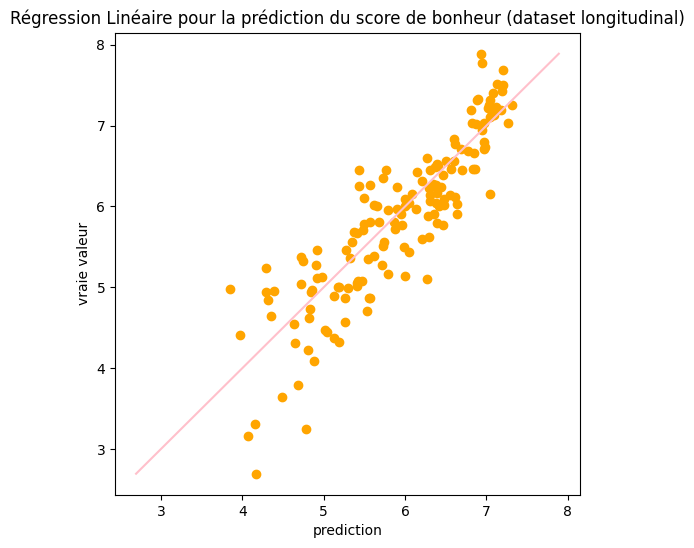

In [ ]:
#Création d'un graphique pour la prédiction du modèle
pred_test = model.predict(X_test)

plt.figure(figsize = (6,6))
plt.scatter(pred_test, y_test, c = 'orange')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'pink')
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Régression Linéaire pour la prédiction du score de bonheur (dataset longitudinal)')
plt.show()

Dans un premier temps nous avons réalisé une régression avec toutes les variables à disposition (qui nous paraissaient pertinentes),
puis nous avons enlevé une à une les variables ayant la p-value la plus grande, tant que la p-value était supérieure à .05. 
Grâce à cet approche, nous avons été en mesure de proposer un modèle parcimonieux et
présentant une valeur explicative correcte puisqu'il explique environ 77% de la variance du bonheur d'un pays. Il n'est pas 
surentrainé car le carré moyen de l'erreur est supérieur en phase d'entrainement (0.265) en relation à la phase de
test (0.227).

**3.Régression Ridge**

Nouvel import et préparation des données

In [ ]:
#Importer les données
df = pd.read_csv('df_final.csv')

#Suppression de colonnes inutiles
df = df.drop(['Positive affect', 'Negative affect'], axis=1)

In [ ]:
# Variables prédictives
predictors = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Unemployment rate', 'War country', 'Generosity']

# Variable dépendante
dependent = 'Life Ladder'

# Filtrage des données pour l'entraînement (2011 à 2018)
train_data = df[(df['year'] >= 2011) & (df['year'] <= 2018)]

# Filtrage des données pour le test (2019 à 2020)
test_data = df[(df['year'] >= 2019) & (df['year'] <= 2020)]

# Variables prédictives pour l'entraînement
X_train = train_data[predictors]

# Variable dépendante pour l'entraînement
y_train = train_data[dependent]

# Variables prédictives pour le test
X_test = test_data[predictors]

# Variable dépendante pour le test
y_test = test_data[dependent]

# Vérification des dimensions
print("Dimensions du jeu d'entraînement - X_train :", X_train.shape)
print("Dimensions du jeu de test - X_test :", X_test.shape)
print("Dimensions du jeu d'entraînement - y_train :", y_train.shape)
print("Dimensions du jeu de test - y_test :", y_test.shape)

# Copie du DataFrame d'entraînement
df_train_scaled = train_data.copy()

Dimensions du jeu d'entraînement - X_train : (624, 7)
Dimensions du jeu de test - X_test : (156, 7)
Dimensions du jeu d'entraînement - y_train : (624,)
Dimensions du jeu de test - y_test : (156,)


In [ ]:
#STANDARDISATION
from sklearn import preprocessing


# Standardisation des variables prédictives pour l'entraînement
scaler_predictors_train = preprocessing.StandardScaler()
df_train_scaled[predictors] = scaler_predictors_train.fit_transform(train_data[predictors])

# Standardisation de la variable dépendante pour l'entraînement
scaler_dependent_train = preprocessing.StandardScaler()
df_train_scaled[dependent] = scaler_dependent_train.fit_transform(train_data[dependent].values.reshape(-1, 1))

# Copie du DataFrame de test
df_test_scaled = test_data.copy()

# Standardisation des variables prédictives pour le test
scaler_predictors_test = preprocessing.StandardScaler()
df_test_scaled[predictors] = scaler_predictors_test.fit_transform(test_data[predictors])

# Standardisation de la variable dépendante pour le test
scaler_dependent_test = preprocessing.StandardScaler()
df_test_scaled[dependent] = scaler_dependent_test.fit_transform(test_data[dependent].values.reshape(-1, 1))

# Assigner les DataFrames standardisés à X_train, y_train, X_test et y_test
X_train = df_train_scaled[predictors]
y_train = df_train_scaled[dependent]
X_test = df_test_scaled[predictors]
y_test = df_test_scaled[dependent]

# Affichage des statistiques descriptives du jeu d'entraînement
df_train_scaled.describe()

# Affichage des statistiques descriptives du jeu de test
df_test_scaled.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Unemployment rate,War country
count,156.00000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,156.000000,1.560000e+02,1.560000e+02
mean,2019.50000,-2.675922e-16,1.893073e-15,4.668630e-16,1.594166e-15,-3.871547e-16,0.000000,1.138690e-17,7.401487e-17
std,0.50161,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221,1.003221e+00,1.003221e+00
min,2019.00000,-3.156835e+00,-2.370324e+00,-3.961507e+00,-2.701394e+00,-3.207344e+00,-1.921080,-1.493746e+00,-5.279096e-01
25%,2019.00000,-7.363482e-01,-5.137819e-01,-6.160852e-01,-4.788844e-01,-6.004396e-01,-0.690792,-6.495590e-01,-5.279096e-01
50%,2019.50000,1.188540e-01,1.601191e-01,3.407984e-01,1.080121e-01,1.009102e-01,-0.208577,-3.058213e-01,-5.279096e-01
75%,2020.00000,6.437850e-01,8.387152e-01,8.473839e-01,9.065762e-01,7.943202e-01,0.743017,3.533946e-01,-5.279096e-01
max,2020.00000,2.042433e+00,1.702910e+00,1.167977e+00,1.474230e+00,1.588301e+00,2.472021,4.480816e+00,1.894264e+00


Application du modèle

In [ ]:
##Application de la regression Ridge
from sklearn.linear_model import RidgeCV

ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train) 

RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions sur le jeu d'entraînement
y_train_pred = ridge_reg.predict(X_train)

# Prédictions sur le jeu de test
y_test_pred = ridge_reg.predict(X_test)

# Métriques sur le jeu d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métriques sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des métriques
print("Métriques sur le jeu d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu d'entraînement :
MSE (Mean Squared Error) : 0.23960708229878344
MAE (Mean Absolute Error) : 0.3876269167933302
R^2 (Coefficient de détermination) : 0.7603929177012165

Métriques sur le jeu de test :
MSE (Mean Squared Error) : 0.2197369899540528
MAE (Mean Absolute Error) : 0.3661333163248058
R^2 (Coefficient de détermination) : 0.7802630100459472


In [ ]:
best_alpha = ridge_reg.alpha_

# Obtention des coefficients du modèle avec le meilleur alpha
coefficients = ridge_reg.coef_

# Affichage du meilleur alpha et des coefficients
print("Meilleur alpha :", best_alpha)
print("Coefficients :")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Variable : {feature}")
    print(f"Coefficient : {coef}")
    print()

Meilleur alpha : 10.0
Coefficients :
Variable : Log GDP per capita
Coefficient : 0.4606336011195017

Variable : Social support
Coefficient : 0.2098787216673584

Variable : Healthy life expectancy at birth
Coefficient : 0.18355201344228977

Variable : Freedom to make life choices
Coefficient : 0.1722795678097331

Variable : Unemployment rate
Coefficient : -0.12321722061826107

Variable : War country
Coefficient : 0.03184971040640616

Variable : Generosity
Coefficient : 0.08677277946113837



Équation du modèle :

Bonheur = 0.461 × PIB + 0.210 × Soutien social + 0.184 × Espérance de vie en bonne santé+ 0.172 × Liberté choix de vie - 0.123 × Taux de chômage + 0.032 × Conflits armés + 0.087 × Générosité

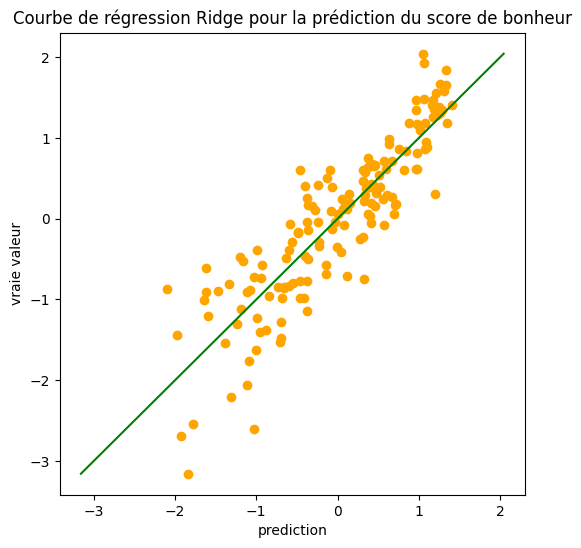

In [ ]:
#scatter plot pour visualiser les prédictions du modèle Ridge par rapport aux vraies valeurs

#Prédiction du modèle Ridge sur le jeu de test
pred_test = ridge_reg.predict(X_test)

# Affichage d'un nuage de points avec les prédictions sur l'axe des abscisses et les vraies valeurs sur l'axe des ordonnées
plt.figure(figsize = (6,6))
plt.scatter(pred_test, y_test, c = 'orange')

# Traçage d'une ligne reliant le point le plus bas au point le plus haut des vraies valeurs pour créer une ligne de référence diagonale
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'green')
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Courbe de régression Ridge pour la prédiction du score de bonheur')
plt.show()

**4. Régression Lasso**

In [ ]:
from sklearn.linear_model import lasso_path

# Liste des valeurs d'alpha à tester
mes_alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

# Calcul des coefficients Lasso pour différentes valeurs d'alpha
alpha_path, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=mes_alphas)

coefs_lasso.shape

(7, 10)

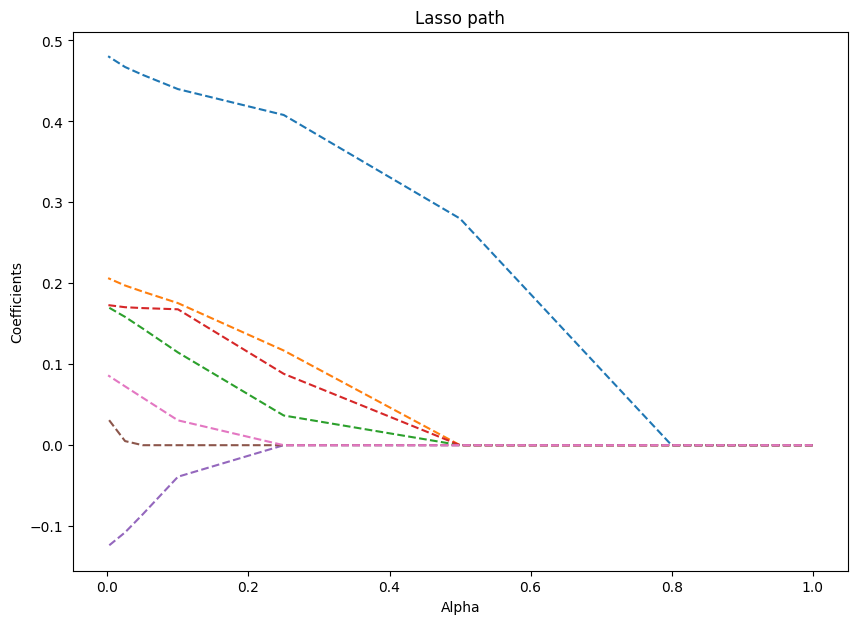

In [ ]:
##Visualisation des valeurs des coefficients Lasso en fonction des différentes valeurs d'alpha


plt.figure(figsize=(10, 7))

# Parcours des lignes de la matrice des coefficients Lasso
for i in range(coefs_lasso.shape[0]):
      # Tracé des coefficients Lasso en fonction des valeurs d'alpha
    plt.plot(alpha_path, coefs_lasso[i,:], '--')

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path');

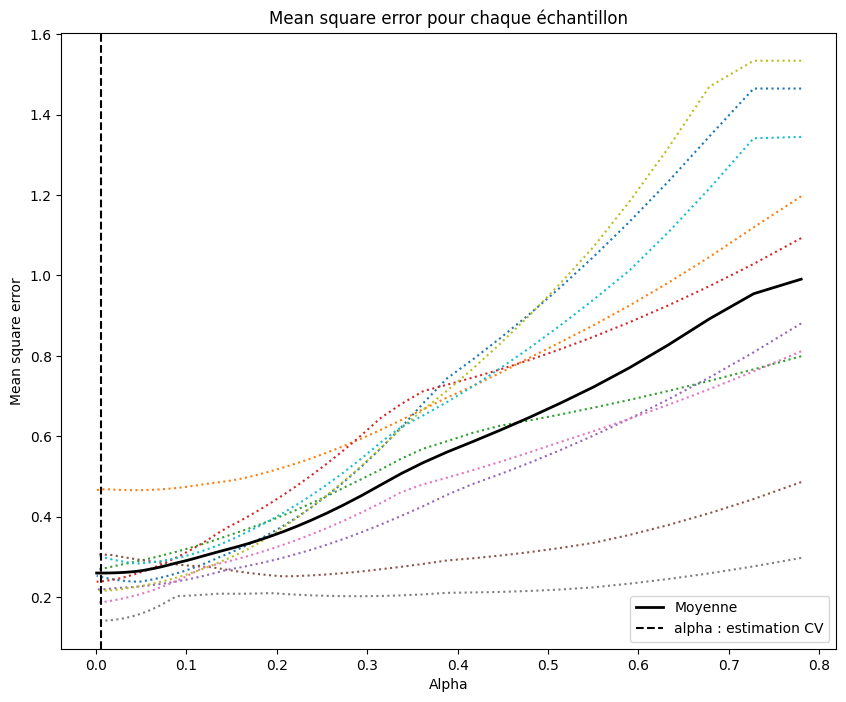

In [ ]:
from sklearn.linear_model import LassoCV

# Création d'un objet modèle LassoCV avec une validation croisée de 10 plis
model_lasso = LassoCV(cv=10).fit(X_train, y_train)

# Obtention des valeurs d'alpha utilisées par le modèle LassoCV
alphas = model_lasso.alphas_

plt.figure(figsize=(10, 8))

# Tracé des courbes des erreurs quadratiques moyennes pour chaque valeur d'alpha
plt.plot(alphas, model_lasso.mse_path_, ':')

# Tracé de la courbe de la moyenne des erreurs quadratiques moyennes pour chaque valeur d'alpha
plt.plot(alphas, model_lasso.mse_path_.mean(axis=1), 'k', label='Moyenne', linewidth=2)

# Ajout d'une ligne verticale pour indiquer la valeur d'alpha sélectionnée par la validation croisée
plt.axvline(model_lasso.alpha_, linestyle='--', color='k', label='alpha : estimation CV')

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error pour chaque échantillon')
plt.legend();

Evaluation des performances du modèle Lasso

In [ ]:
## Prédiction du modèle Lasso sur le jeu de test
pred_test = model_lasso.predict(X_test)

## Calcul des scores du modèle 
print('score test :', model_lasso.score(X_test, y_test))
print('mse test :', mean_squared_error(pred_test, y_test))

score test : 0.779962166248611
mse test : 0.22003783375138894


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédictions sur le jeu d'entraînement
y_train_pred = model_lasso.predict(X_train)

# Prédictions sur le jeu de test
y_test_pred = model_lasso.predict(X_test)

# Métriques sur le jeu d'entraînement
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Métriques sur le jeu de test
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des métriques
print("Métriques sur le jeu d'entraînement :")
print("MSE (Mean Squared Error) :", mse_train)
print("MAE (Mean Absolute Error) :", mae_train)
print("R^2 (Coefficient de détermination) :", r2_train)
print("\nMétriques sur le jeu de test :")
print("MSE (Mean Squared Error) :", mse_test)
print("MAE (Mean Absolute Error) :", mae_test)
print("R^2 (Coefficient de détermination) :", r2_test)

Métriques sur le jeu d'entraînement :
MSE (Mean Squared Error) : 0.2395998420756539
MAE (Mean Absolute Error) : 0.38792293718141463
R^2 (Coefficient de détermination) : 0.7604001579243461

Métriques sur le jeu de test :
MSE (Mean Squared Error) : 0.22003783375138894
MAE (Mean Absolute Error) : 0.3669020910188668
R^2 (Coefficient de détermination) : 0.779962166248611


In [ ]:
#régression linéaire avec régularisation L1


from sklearn.linear_model import Lasso

# Création d'un objet modèle Lasso avec un paramètre d'alpha (régularisation)
alpha = 0  # Valeur d'alpha à ajuster selon vos besoins
lasso_model = Lasso(alpha=alpha)

# Entraînement du modèle sur les données d'entraînement
lasso_model.fit(X_train, y_train)

# Obtention des coefficients du modèle
coefficients = lasso_model.coef_

# Affichage des coefficients
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Variable : {feature}")
    print(f"Coefficient : {coef}")
    print()

Variable : Log GDP per capita
Coefficient : 0.48099686882232906

Variable : Social support
Coefficient : 0.20675445258881675

Variable : Healthy life expectancy at birth
Coefficient : 0.1711678612377006

Variable : Freedom to make life choices
Coefficient : 0.17317240844259132

Variable : Unemployment rate
Coefficient : -0.12552452360805308

Variable : War country
Coefficient : 0.033657361286636794

Variable : Generosity
Coefficient : 0.08682666757135855



<ipython-input-172-36d74399ef16>:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.472e+01, tolerance: 6.240e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Équation du modèle :

Bonheur = 0.48 × PIB + 0.21 × Soutien social + 0.17 × Espérance de vie en bonne santé
0.17 × Liberté choix de vie - 0.13 × Taux de chômage + 0.03 × Conflits armés + 0.09 × Générosité

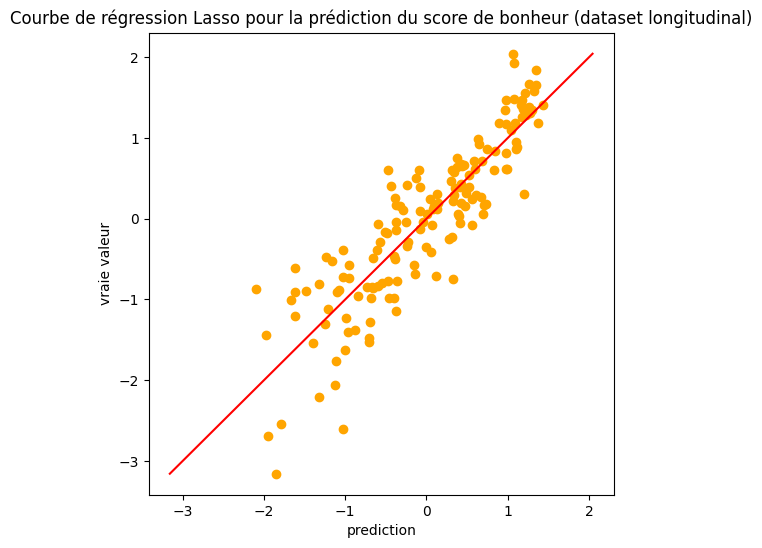

In [ ]:
# Prédiction du modèle Lasso sur le jeu de test
pred_test = lasso_model.predict(X_test)

plt.figure(figsize = (6,6))

# Tracé du nuage de points avec les prédictions sur l'axe des abscisses et les vraies valeurs sur l'axe des ordonnées
plt.scatter(pred_test, y_test, c = 'orange')

# Tracé d'une ligne diagonale allant du minimum au maximum des vraies valeurs, en couleur rouge
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'red')

plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Courbe de régression Lasso pour la prédiction du score de bonheur (dataset longitudinal)')
plt.show()

**5.Régression Elastic net**

In [ ]:
from sklearn.linear_model import ElasticNetCV

# Création d'un objet modèle Elastic Net avec une validation croisée à 8 plis et une liste de rapports L1/L2 spécifiés
model_en = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))

# Entraînement du modèle Elastic Net sur les données d'entraînement
model_en.fit(X_train, y_train)
#model= LassoCV(cv=10).fit(X_train, y_train)

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

In [ ]:
#Créer un Df des coefficients du modèle Elastic Net + l'intercept 

coeffs = list(model_en.coef_)
coeffs.insert(0, model_en.intercept_)
feats = list(data.columns)
feats.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats)

NameError: ignored

Equation de régression:
Bonheur = 0.432 × PIB + 0.208 × Soutien social + 0.190 × Espérance de vie en bonne santé + 0.169 × Liberté choix de vie - 0.112 × Taux de chômage + 0.016 × Conflits armés + 0.080 × Générosité

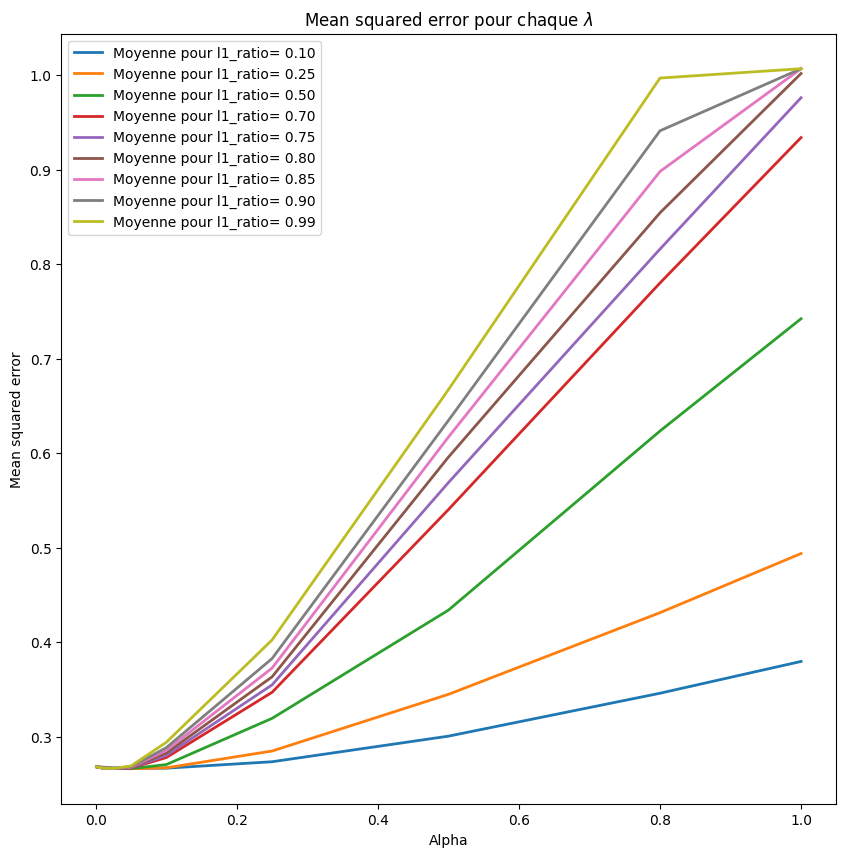

In [ ]:
#tracer les courbes d'erreur quadratique moyenne en fonction des valeurs d'alpha pour chaque rapport L1/L2 utilisé lors de l'entraînement du modèle Elastic Net

alphas = model_en.alphas_

plt.figure(figsize=(10, 10))

for i in range(model_en.mse_path_.shape[0]) :
    plt.plot(alphas, model_en.mse_path_[i,:,:].mean(axis=1),
             label='Moyenne pour l1_ratio= %.2f' %model_en.l1_ratio[i], linewidth=2)

plt.xlabel('Alpha')
plt.ylabel('Mean squared error')
plt.title('Mean squared error pour chaque $\lambda$')
plt.legend();

In [ ]:
# Prédictions sur les jeux d'entraînement et de test en utilisant le modèle Elastic Net entraîné
pred_train = model_en.predict(X_train)
pred_test = model_en.predict(X_test)


train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))


print("RMSE sur le jeu d'entraînement :", train_rmse)
print("RMSE sur le jeu de test :", test_rmse)

RMSE sur le jeu d'entraînement : 0.49106588874297064
RMSE sur le jeu de test : 0.4672783823808902


In [ ]:
#Evaluation du modèle
print('score train :', model_en.score(X_train, y_train))
print('score test :', model_en.score(X_test, y_test))

score train : 0.7588542929130764
score test : 0.7816509133594985


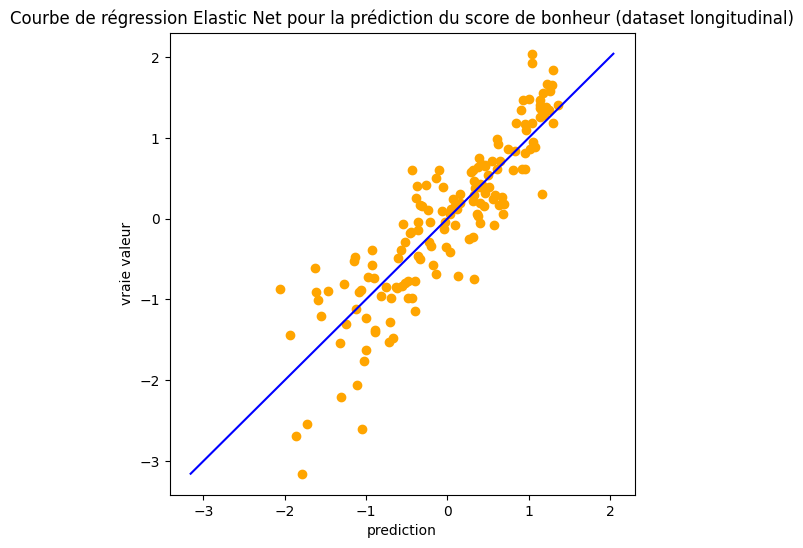

In [ ]:
# Prédiction du modèle Elastic net sur le jeu de test

pred_test = model_en.predict(X_test)

plt.figure(figsize = (6,6))
plt.scatter(pred_test, y_test, c = 'orange')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), c = 'blue')
plt.xlabel("prediction")
plt.ylabel("vraie valeur")
plt.title('Courbe de régression Elastic Net pour la prédiction du score de bonheur (dataset longitudinal)')
plt.show()

### **II.Modèles de classification**

In [ ]:
#Import des packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Importer à nouveau le df
df = pd.read_csv('df_final.csv')

#Observations
display(df.head())
display(df.info())

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect,Unemployment rate,War country
0,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.628,0.257,13.48,0
1,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.607,0.271,13.38,0
2,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.634,0.338,15.87,0
3,Albania,2014,4.814,9.378,0.626,67.52,0.735,-0.025,0.685,0.335,18.05,0
4,Albania,2015,4.607,9.403,0.639,67.80,0.704,-0.081,0.688,0.350,17.19,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      780 non-null    object 
 1   year                              780 non-null    int64  
 2   Life Ladder                       780 non-null    float64
 3   Log GDP per capita                780 non-null    float64
 4   Social support                    780 non-null    float64
 5   Healthy life expectancy at birth  780 non-null    float64
 6   Freedom to make life choices      780 non-null    float64
 7   Generosity                        780 non-null    float64
 8   Positive affect                   780 non-null    float64
 9   Negative affect                   780 non-null    float64
 10  Unemployment rate                 780 non-null    float64
 11  War country                       780 non-null    int64  
dtypes: float

None

**1. Préparation des données**

In [ ]:
# création de la colonne catégorielle correspondant au score de bonheur, basé sur les tertiles
df['hapiness_categ'] = pd.qcut(df['Life Ladder'], q=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
df['hapiness_categ'].value_counts()

High      265
Low       258
Medium    257
Name: hapiness_categ, dtype: int64

In [ ]:
# suppression des colonnes inutiles
df = df.drop(['Country name', 'year', 'Life Ladder', 'Positive affect', 'Negative affect'], axis = 1)

In [ ]:
# séparation des variables explicatives et de la variable cible
feats = df.drop('hapiness_categ', axis = 1)
target = df.hapiness_categ

In [ ]:
# Création des jeux de données de test et d'entrainement

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.20, random_state = 42)

In [ ]:
# Standardisation des variables explicatives
sc = StandardScaler()

X_train[X_train.columns] = sc.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = sc.transform(X_test[X_test.columns])

In [ ]:
# Encodage de la variable cible
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

**2. Régression logistique**

In [ ]:
# Application d'un régression logistique
reglog = LogisticRegression()

reglog.fit(X_train, y_train)

#Affichage des scores
print('Score sur ensemble train', reglog.score(X_train, y_train))
print('Score sur ensemble test', reglog.score(X_test, y_test))

# Les deux scores sont élevés et proches, il n'y a pas d'overfitting

Score sur ensemble train 0.7307692307692307
Score sur ensemble test 0.782051282051282


In [ ]:
# classification_report et matrice de confusion
y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

# Le modèle semble plutôt performant

Prédiction,0,1,2
Realité,,,
0,39,0,6
1,0,47,9
2,6,13,36


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.78      0.84      0.81        56
           2       0.71      0.65      0.68        55

    accuracy                           0.78       156
   macro avg       0.79      0.79      0.79       156
weighted avg       0.78      0.78      0.78       156



Tentative de modification des hyperparamètres


```



In [ ]:
param_grid = {'C' : np.logspace(-4, 4, 50), 'penalty' : ['l1', 'l2'], 'solver' : ['lbfgs', 'saga', 'newton-cg']}

In [ ]:
CV_reglog = GridSearchCV(estimator=reglog, param_grid=param_grid, cv= 5)

In [ ]:
CV_reglog.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'saga', 'newton-cg']})

In [ ]:
CV_reglog.best_params_

{'C': 0.05963623316594643, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
#Nouvelle application de la regression logistique avec modification des hyperparamètre
reglog2 = LogisticRegression(C = 0.05963623316594643, penalty = 'l2', solver = 'lbfgs')

reglog2.fit(X_train, y_train)

#Affichage nouveaux scores
print('Score sur ensemble train', reglog2.score(X_train, y_train))
print('Score sur ensemble test', reglog2.score(X_test, y_test))

# Le résultat est meilleur en test mais ça crée un overfitting, il faut revoir les hyperparamètres

Score sur ensemble train 0.7355769230769231
Score sur ensemble test 0.8012820512820513


In [ ]:
# classification_report et matrice de confusion
y_pred_2 = reglog2.predict(X_test)

display(pd.crosstab(y_test,y_pred_2, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_2))

Prédiction,0,1,2
Realité,,,
0,41,0,4
1,0,46,10
2,6,11,38


              precision    recall  f1-score   support

           0       0.87      0.91      0.89        45
           1       0.81      0.82      0.81        56
           2       0.73      0.69      0.71        55

    accuracy                           0.80       156
   macro avg       0.80      0.81      0.81       156
weighted avg       0.80      0.80      0.80       156



**3. Arbre de décision**

In [ ]:
# Application d'un arbre de décision
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Affichage des scores
print('Score sur ensemble train', clf.score(X_train, y_train))
print('Score sur ensemble test', clf.score(X_test, y_test))

#Overfitting

Score sur ensemble train 1.0
Score sur ensemble test 0.7564102564102564


In [ ]:
# classification et matrice de confusion de l'arbre de décision
y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

# Ce modèle semble légèrement moins performant que la régression logistique

Prédiction,0,1,2
Realité,,,
0,42,0,3
1,2,47,7
2,13,13,29


              precision    recall  f1-score   support

           0       0.74      0.93      0.82        45
           1       0.78      0.84      0.81        56
           2       0.74      0.53      0.62        55

    accuracy                           0.76       156
   macro avg       0.75      0.77      0.75       156
weighted avg       0.76      0.76      0.75       156



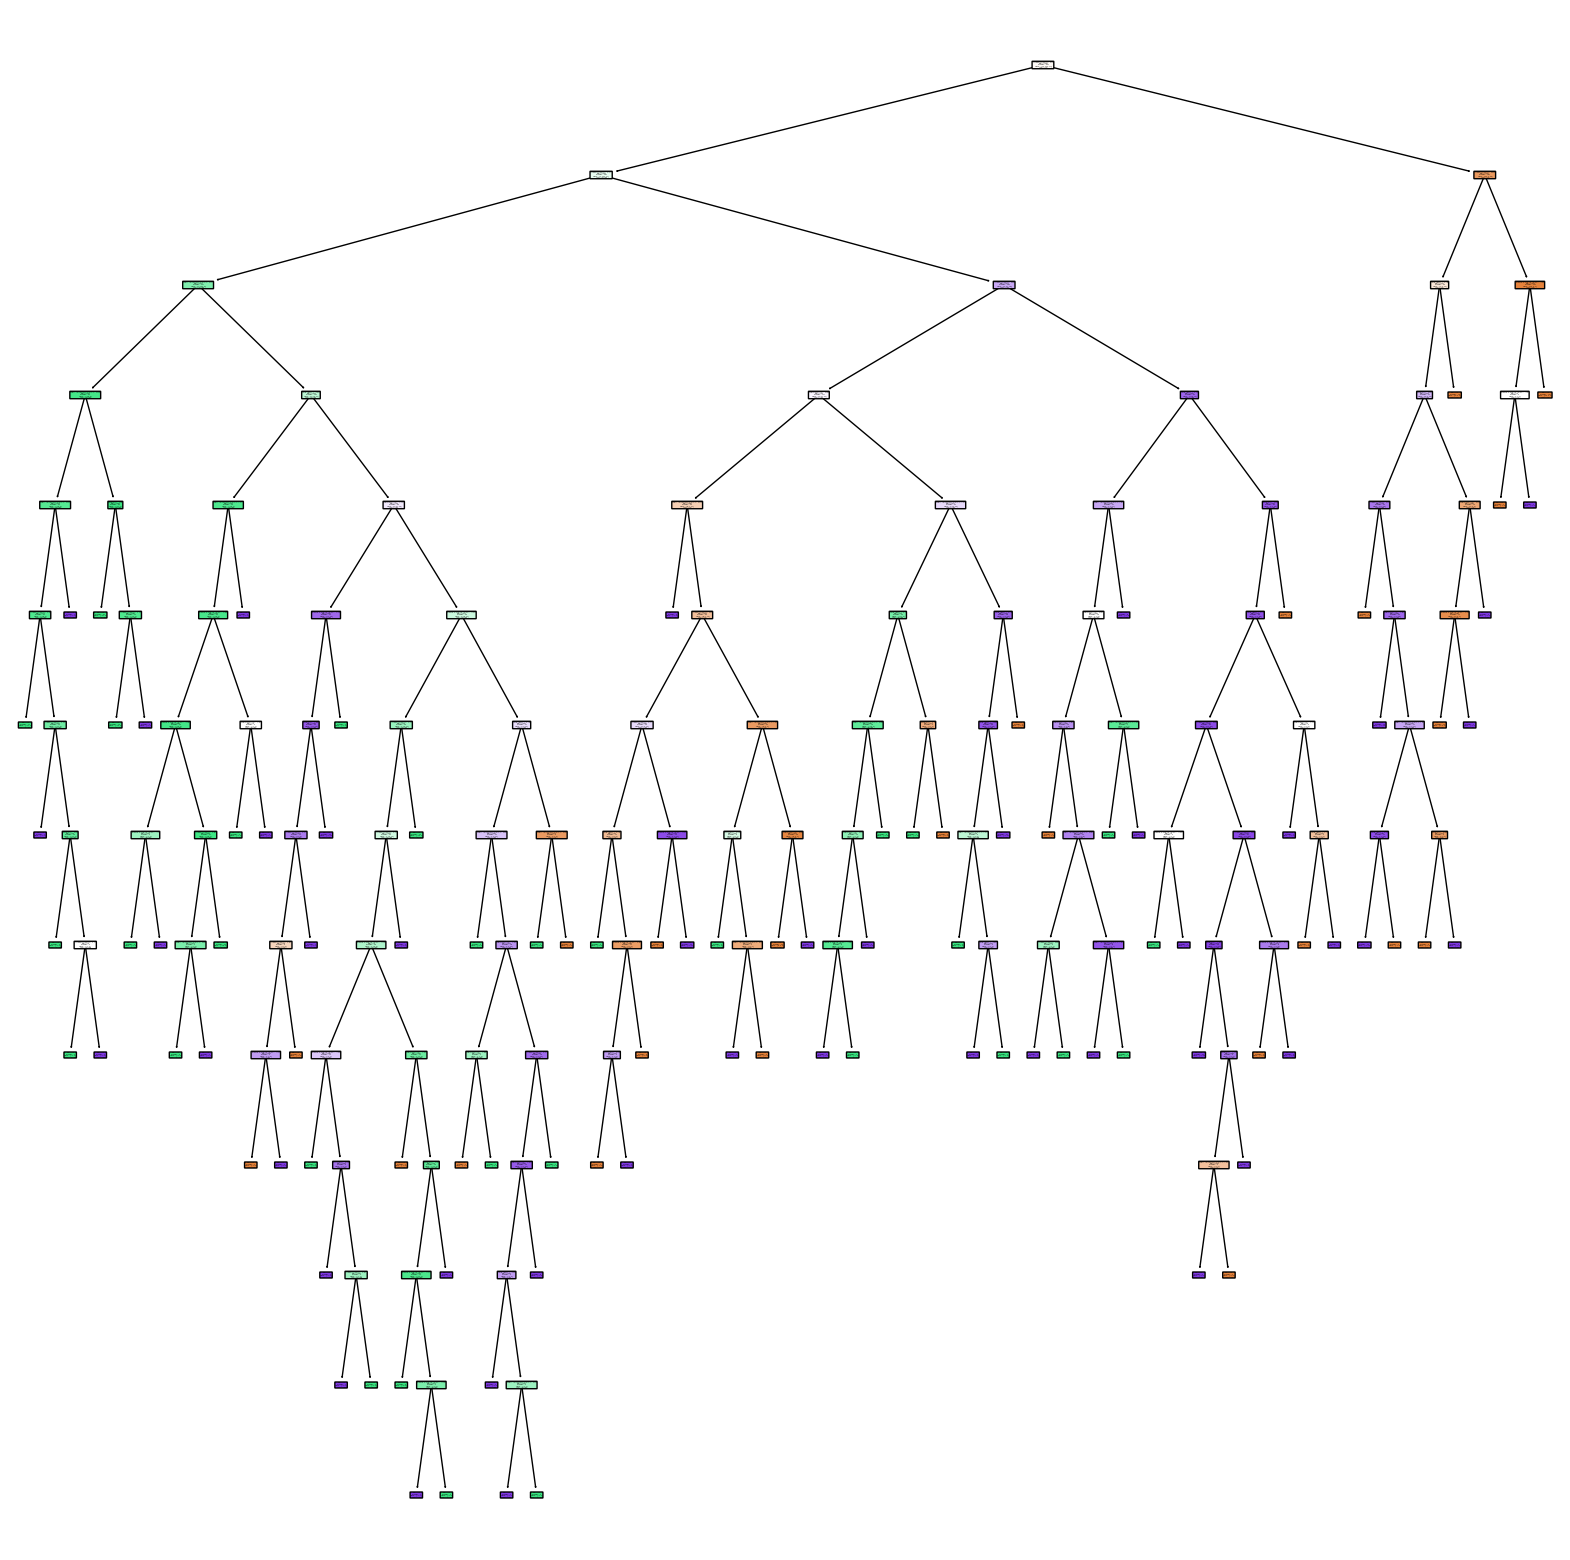

In [ ]:
# Affichage de l'arbre de décision
fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['Log GDP per capita','Social support','Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Uneployment rate', 'War country'],
          class_names = ['Low','Medium','High'],
          filled = True, 
          rounded = True)

plt.show()

Tentative de modification des hyperparamètres


In [ ]:
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}

In [ ]:
grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

In [ ]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3]},
             verbose=2)

In [ ]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 2}

In [ ]:
#Rentrainement du modèle avec la modification des hyperparamètres
clf2 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
clf2.fit(X_train, y_train)

#Affichage des scores
print('Score sur ensemble train', clf2.score(X_train, y_train))
print('Score sur ensemble test', clf2.score(X_test, y_test))

# Rsultats moins bons

Score sur ensemble train 0.7291666666666666
Score sur ensemble test 0.6602564102564102


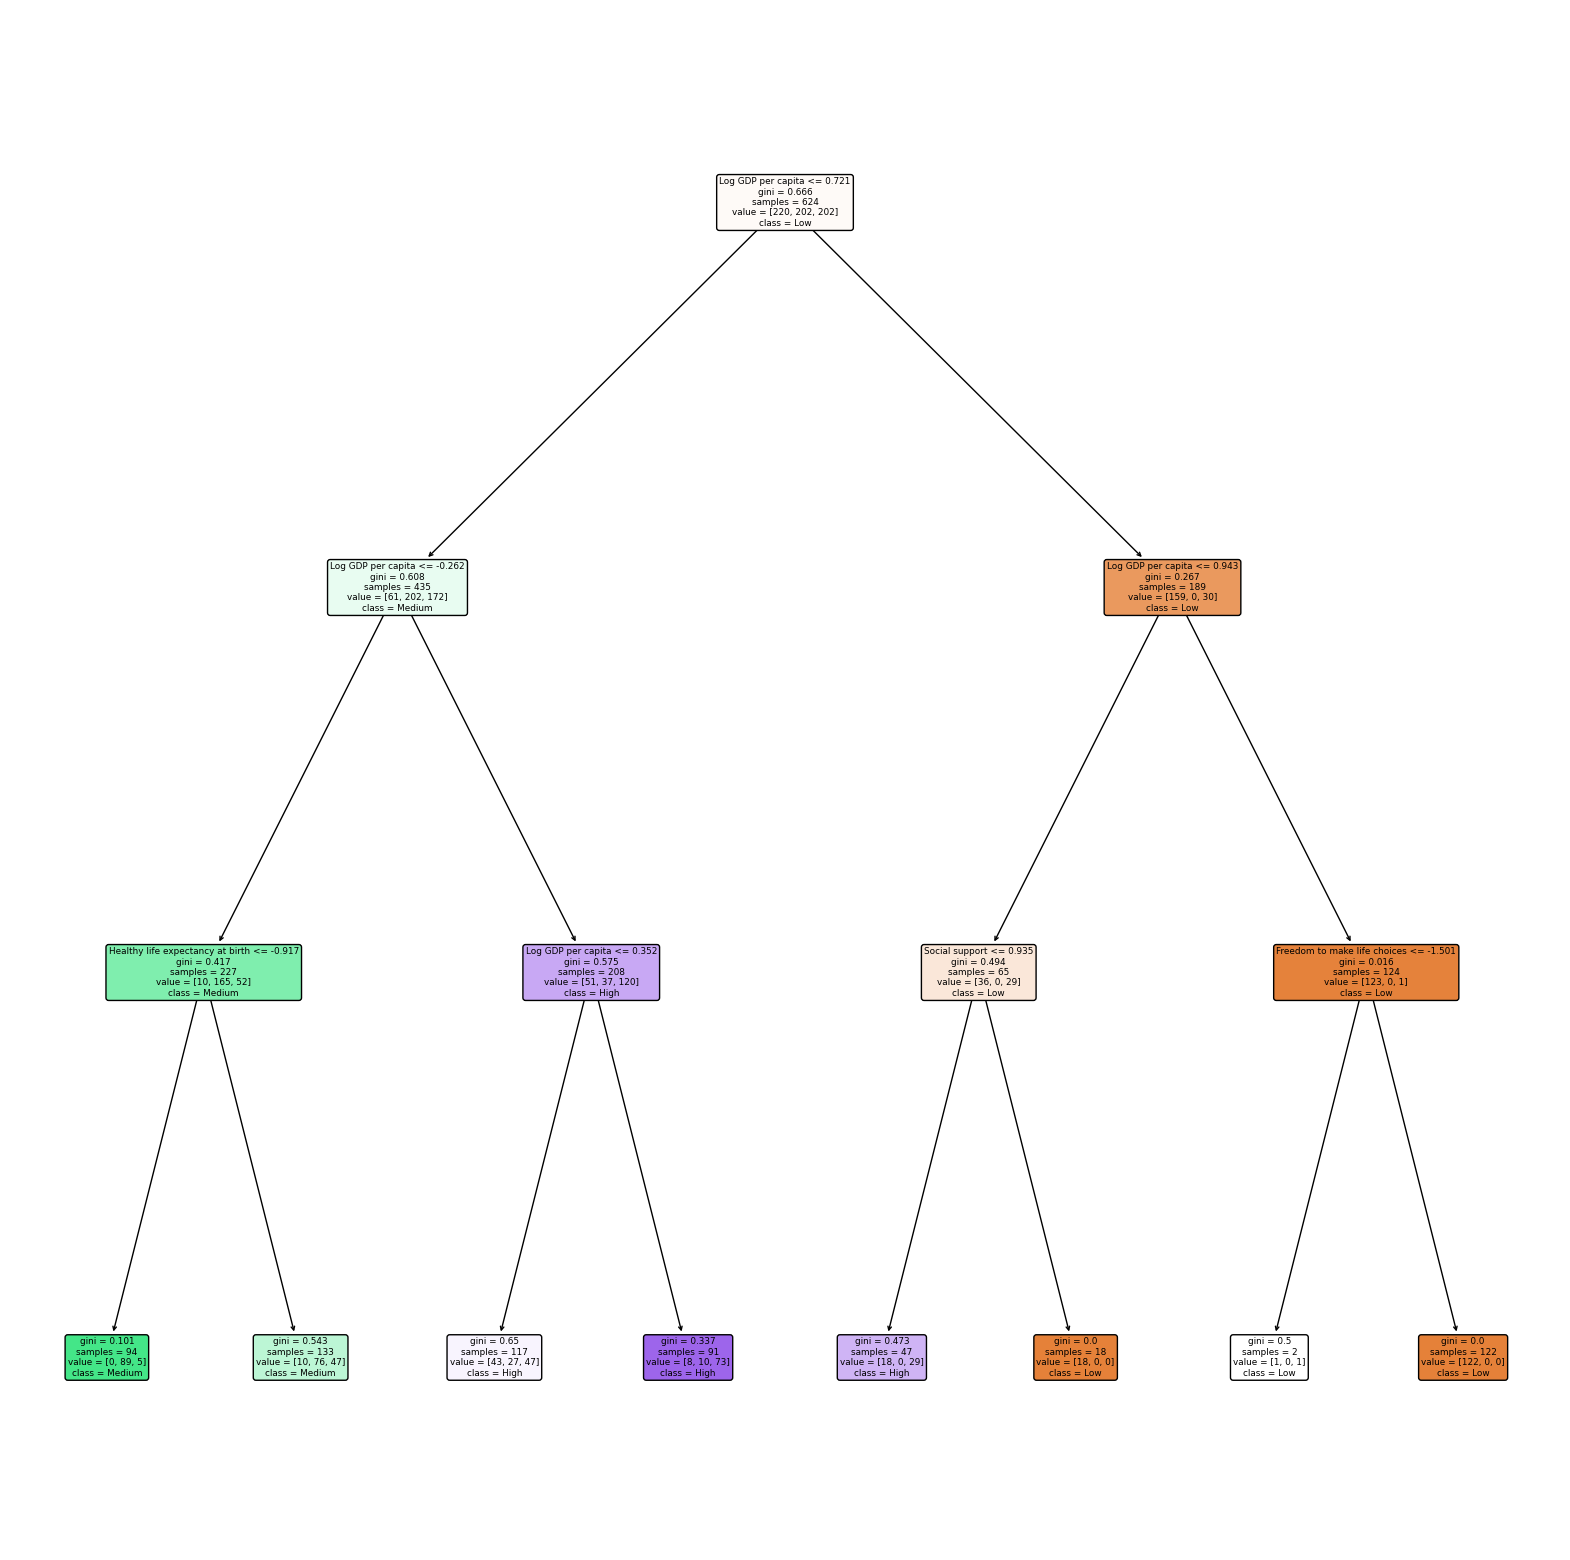

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf2, 
          feature_names = ['Log GDP per capita','Social support','Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Uneployment rate', 'War country'],
          class_names = ['Low','Medium','High'],
          filled = True, 
          rounded = True)

plt.show()

<Axes: >

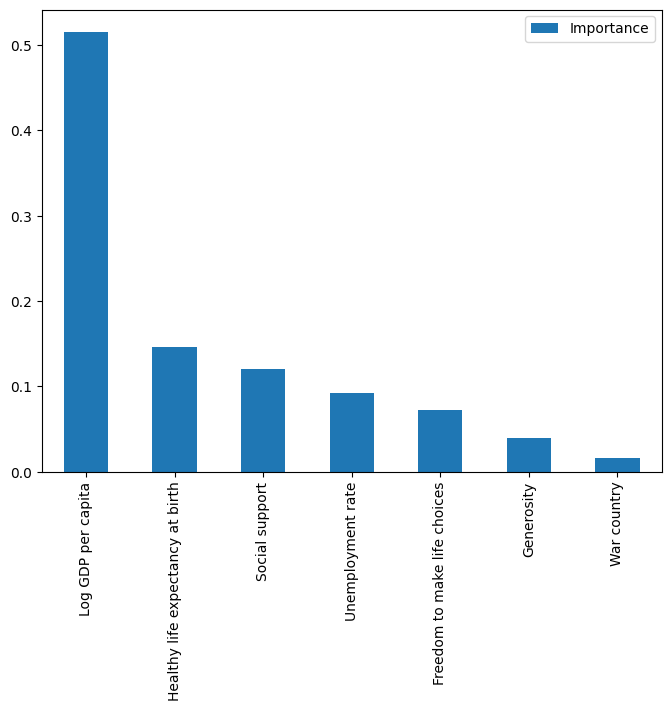

In [ ]:
# Affichage des variables par ordre d'importance


# Création d'un DataFrame pour stocker les importances des features
feat_importances = pd.DataFrame(clf.feature_importances_, index=feats.columns, columns=["Importance"])

# Tri des features par ordre décroissant d'importance
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Tracé d'un diagramme en barres pour visualiser les importances des features

feat_importances.plot(kind='bar', figsize=(8,6))

In [ ]:
# Entraînement du modèle en ne gardant que les 3 variables les plus importantes : PIB, taux de chômage et espérance de vie en bonne santé
X_train_new = X_train[['Log GDP per capita','Unemployment rate','Healthy life expectancy at birth']]
X_test_new = X_test[['Log GDP per capita','Unemployment rate','Healthy life expectancy at birth']]

clf = tree.DecisionTreeClassifier(random_state=42) 
  
clf.fit(X_train_new, y_train)

print(clf.score(X_train_new,y_train))
print(clf.score(X_test_new,y_test))

#Overfitting

1.0
0.7371794871794872


In [ ]:
# classification report et matrice de confusion du nouveau jeu de données
y_pred = clf.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

# Le modèle semble plus performant, mais est-ce que c'est le cas vu qu'il y a de l'overfitting ?

Prédiction,0,1,2
Realité,,,
0,41,0,4
1,1,49,6
2,14,16,25


              precision    recall  f1-score   support

           0       0.73      0.91      0.81        45
           1       0.75      0.88      0.81        56
           2       0.71      0.45      0.56        55

    accuracy                           0.74       156
   macro avg       0.73      0.75      0.73       156
weighted avg       0.73      0.74      0.72       156



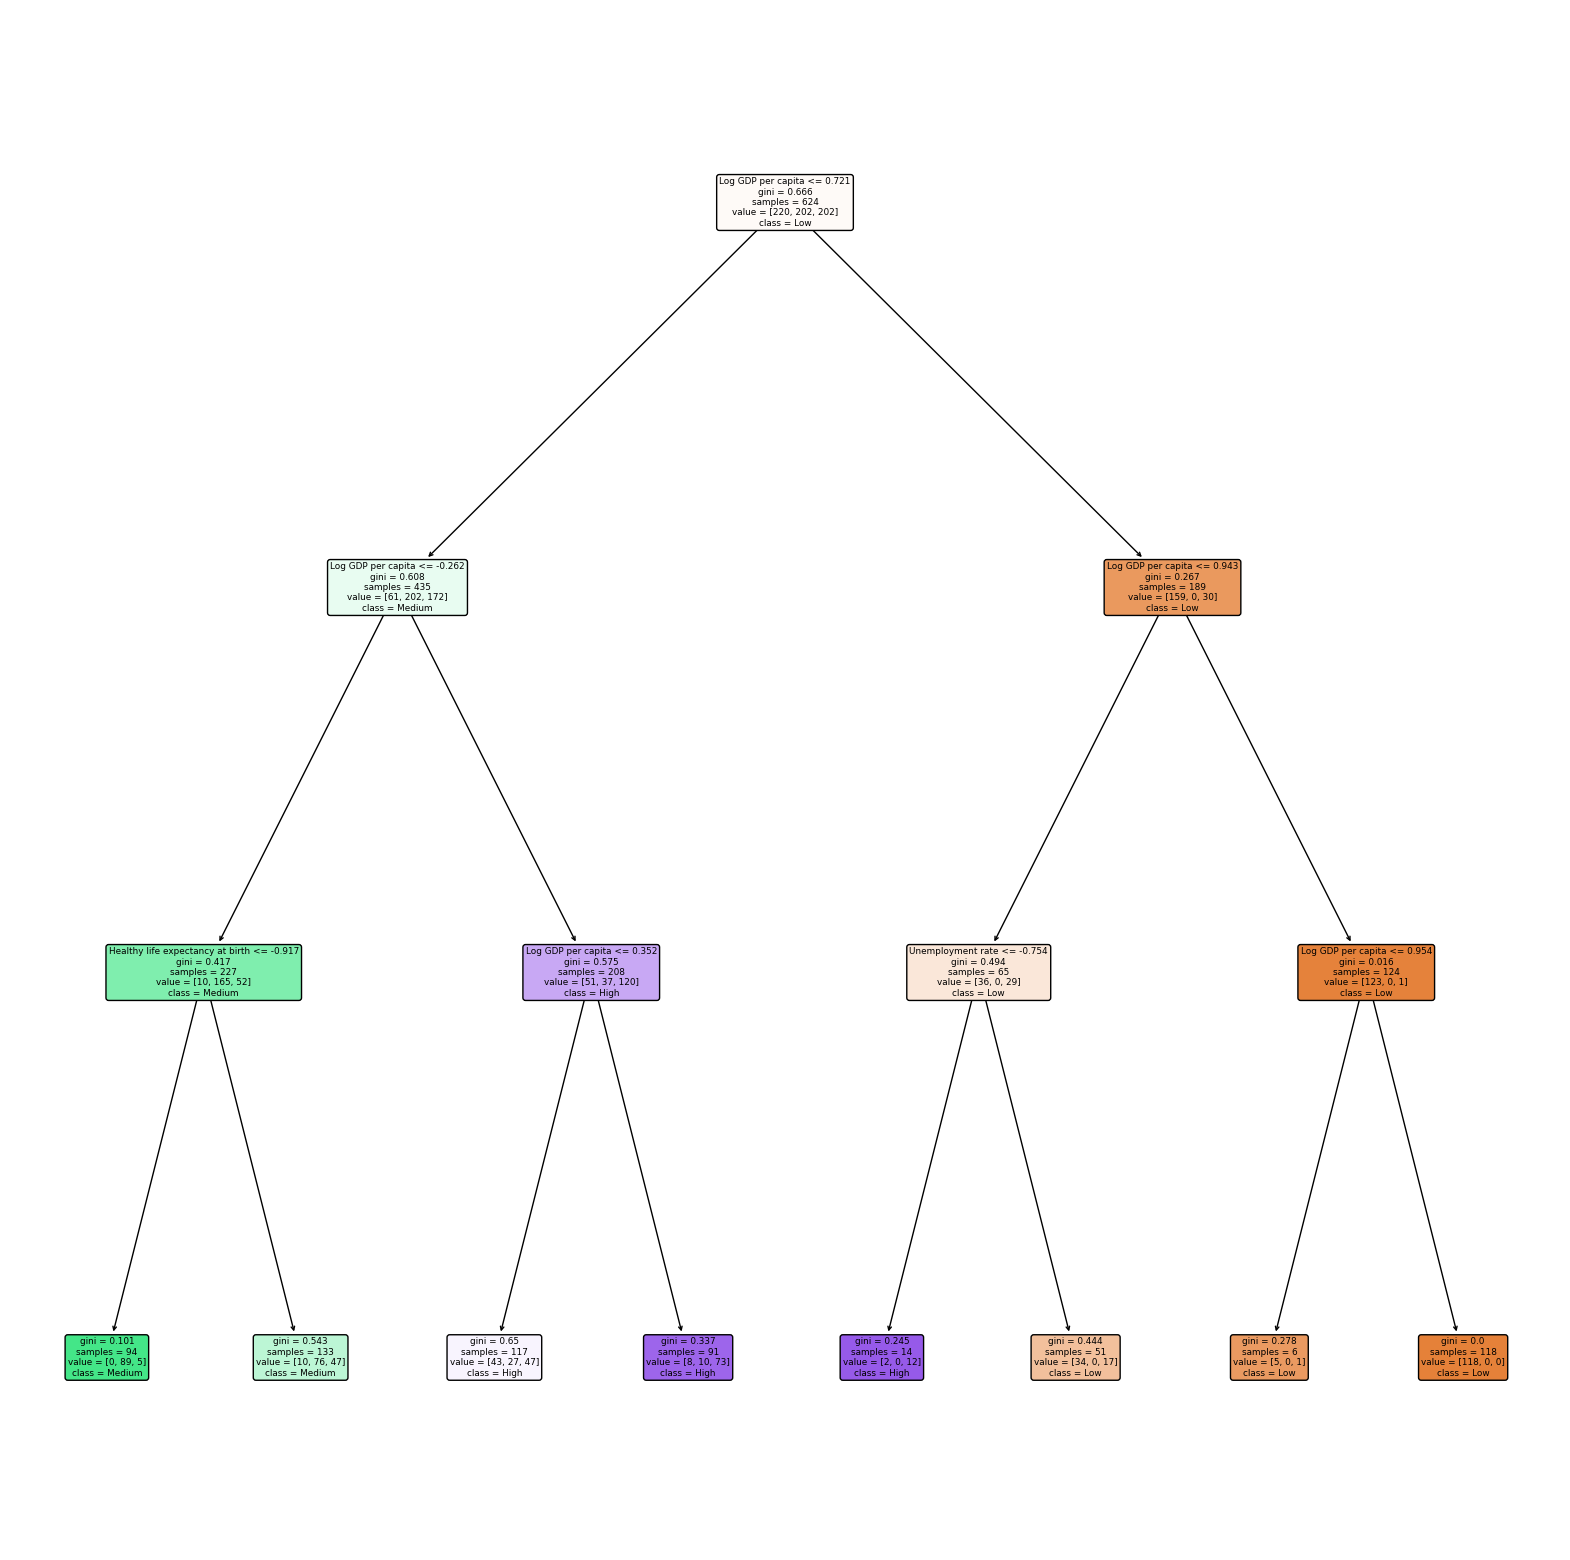

In [ ]:
# Affichage de l'arbre de décision
clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 

clf.fit(X_train_new, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['Log GDP per capita','Unemployment rate','Healthy life expectancy at birth'],
          class_names = ['Low','Medium','High'],
          filled = True, 
          rounded = True)

plt.show()

**4. Random Forest classifier**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

#Affichage des résultats
print('Score sur ensemble train', rf.score(X_train, y_train))
print('Score sur ensemble test', rf.score(X_test, y_test))

Score sur ensemble train 1.0
Score sur ensemble test 0.8269230769230769


In [ ]:
# classification report et matrice de confusion
y_pred = rf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

Prédiction,0,1,2
Realité,,,
0,43,0,2
1,0,49,7
2,7,11,37


              precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.82      0.88      0.84        56
           2       0.80      0.67      0.73        55

    accuracy                           0.83       156
   macro avg       0.83      0.83      0.83       156
weighted avg       0.82      0.83      0.82       156



Tentative de modification des hyperparamètres

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)

In [ ]:
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
#Réentrainement du modèle avec modification des hyperparamtres

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

rfc1.fit(X_train, y_train)

#Affichage des scores
print('Score sur ensemble train', rfc1.score(X_train, y_train))
print('Score sur ensemble test', rfc1.score(X_test, y_test))

# toujours overfitting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score sur ensemble train 0.9807692307692307
Score sur ensemble test 0.8525641025641025


In [ ]:
# classification report et matrice de confusion
y_pred_1 = rfc1.predict(X_test)

display(pd.crosstab(y_test,y_pred_1, rownames=['Realité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_1))

Prédiction,0,1,2
Realité,,,
0,42,0,3
1,0,49,7
2,3,10,42


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.83      0.88      0.85        56
           2       0.81      0.76      0.79        55

    accuracy                           0.85       156
   macro avg       0.86      0.86      0.86       156
weighted avg       0.85      0.85      0.85       156

